<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/modified_weight_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [3]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
193/193 [==============================] - 3s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 2/50
193/193 [==============================] - 1s 3ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 3/50
193/193 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881
Epoch 4/50
193/193 [==============================] - 1s 3ms/step - loss: 8.9439e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 5/50
193/193 [==============================] - 1s 3ms/step - loss: 6.4743e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 6/50
193/193 [==============================] - 1s 3ms/step - loss: 4.5790e-04 - root_mean_squared_error: 0.0214 - val_loss: 0

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [5]:
met_df  = pd.DataFrame(model.history.history)

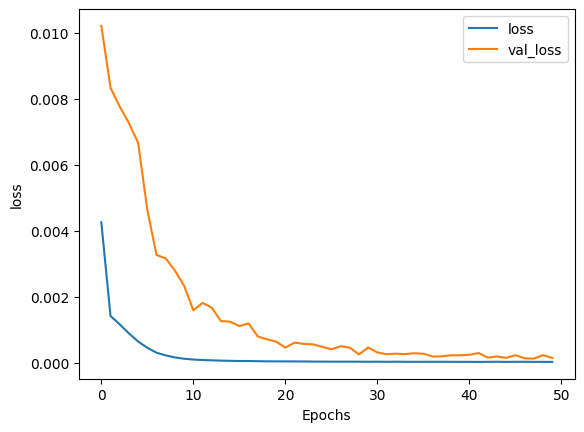

In [6]:
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

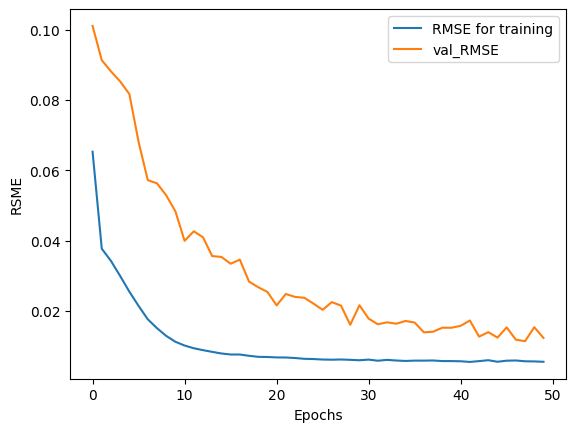

In [7]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [9]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 2ms/step


,time,tem,heating rate,preditions,Weight loss
0,0.000015,0.066503,0.997547,0.019977,0.021829
1,0.000410,0.342108,0.933021,0.106080,0.111508
2,0.001133,0.536705,0.825700,0.175135,0.173681
3,0.001691,0.627016,0.752419,0.198015,0.201777
4,0.002062,0.672531,0.707928,0.211078,0.215722
...,...,...,...,...,...
401,0.069025,0.994999,0.014925,0.077095,0.070636
402,0.069028,0.995000,0.014921,0.077083,0.070621
403,0.069059,0.995002,0.014903,0.076986,0.070565
404,0.069069,0.995003,0.014895,0.076953,0.070540


In [10]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 7.350364777336029e-05
RMSE 0.00857342683956423
MAE 0.0065031729121243385
R2_Score 0.981908856434535


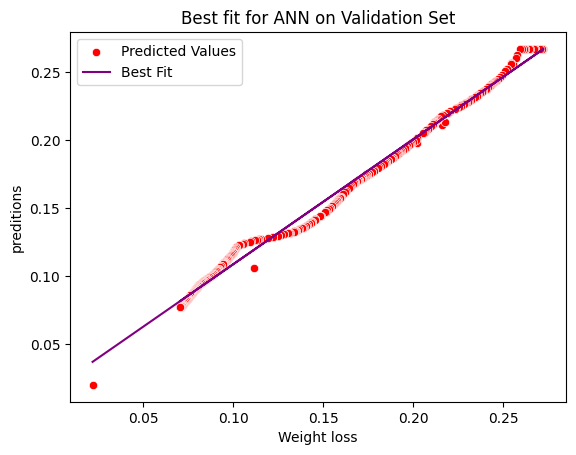

In [11]:
x = final_df['Weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='red', label='Predicted Values')
plt.plot(x, a*x+b, color='purple', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [12]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 7.829611655580283e-05
RMSE 0.008848509284382473
MAE 0.006840273135501703
R2_Score 0.9810816559082477


In [13]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,9.121918e-07,0.016664,0.999846,0.006844,0.005473
1,7.291845e-05,0.148165,0.987769,0.043026,0.048564
2,1.283030e-04,0.195713,0.978567,0.057359,0.064056
3,3.428455e-04,0.314557,0.943672,0.096349,0.102649
4,5.191274e-04,0.381633,0.915920,0.120539,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.077751,0.071153
402,6.896480e-02,0.994992,0.014970,0.077298,0.070787
403,6.897134e-02,0.994992,0.014966,0.077278,0.070776
404,6.897715e-02,0.994993,0.014962,0.077260,0.070764


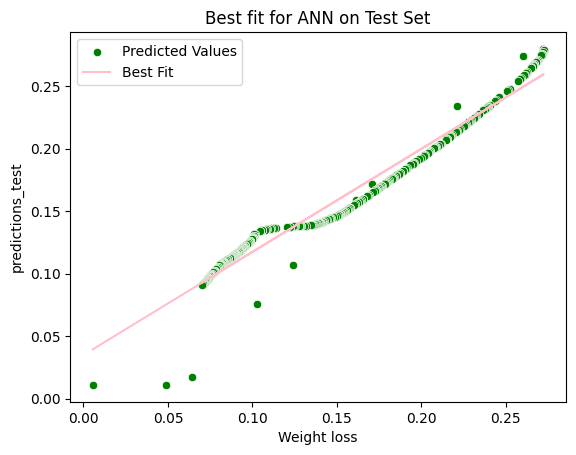

In [ ]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='green', label='Predicted Values')
plt.plot(x, a*x+b, color='pink', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

In [ ]:
from tensorflow.keras.utils import plot_model

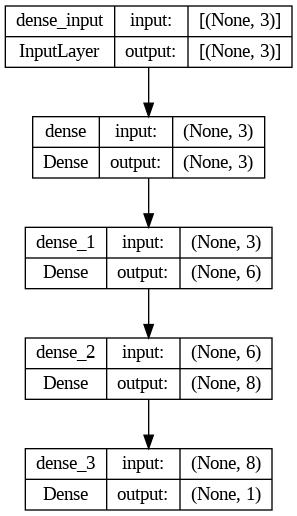

In [ ]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)